<a href="https://colab.research.google.com/github/vinosraj/codingdojo-exercise/blob/main/Project_2_part_01_VSR_03172022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##project 2 - Machine Learning

*   Vino Raj
*   03/13/2022


##To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
#Importing the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
#data import
file_name1= '/content/drive/MyDrive/Coding Dojo/project 02/fetal_health.csv'

df = pd.read_csv(file_name1)

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Prepare/clean the data for exploratory analysis purposes




In [3]:
# Explore the data (check dtypes, number of rows and columns, and check for null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
# Check for duplicates
df.duplicated().sum()

13

In [5]:
duplicateRowsDF = df[df.duplicated(keep=False)]
duplicateRowsDF


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
229,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
233,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
304,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
323,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
326,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0


drop duplicates

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Data type is good to go and the data set doesnt seem to have any missing values


In [10]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Explore the data and make data visualization


In [ ]:
# Visualize distribution of numerical values

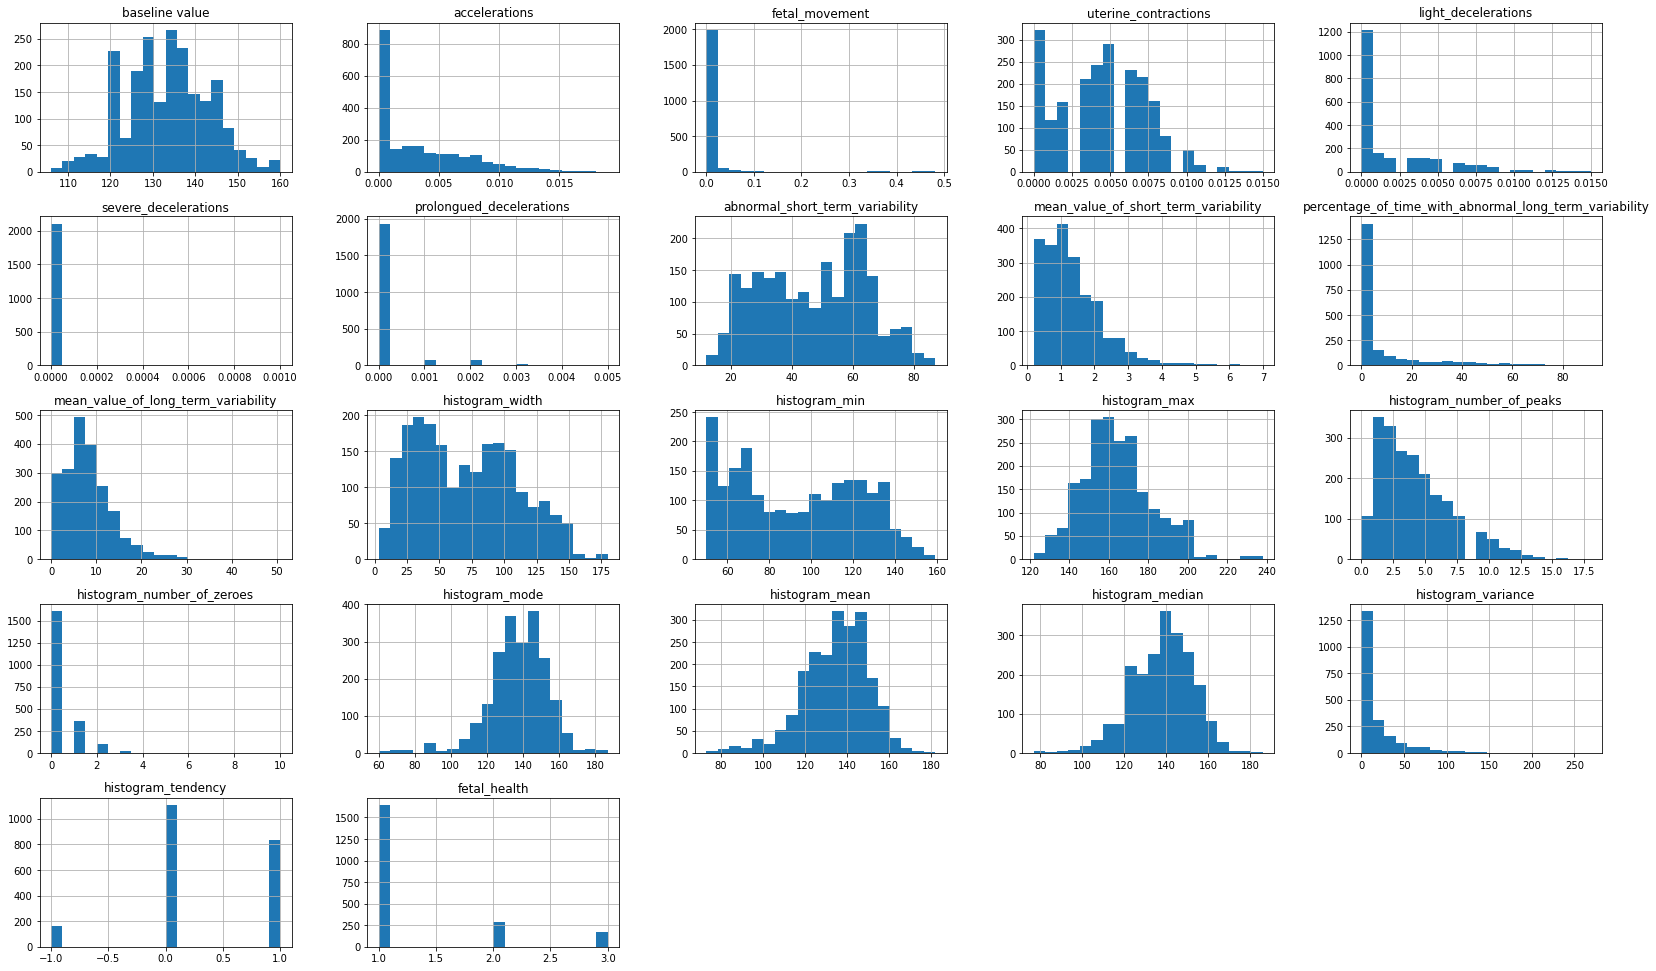

In [ ]:
df.hist(figsize=(28,17), bins = 20)
plt.show()

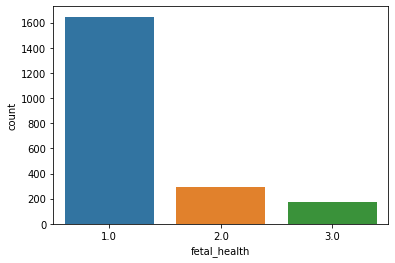

In [ ]:
import seaborn as sns
sns.countplot(data =df, x = "fetal_health")

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

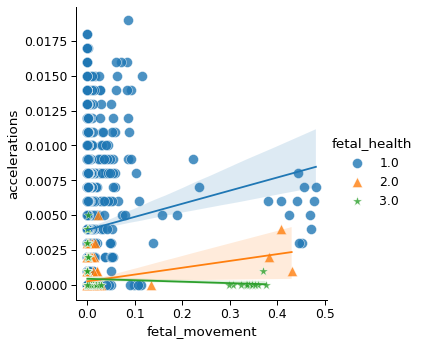

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

sns.lmplot(x='fetal_movement', y='accelerations', hue='fetal_health', data=df, markers=['o', '^','*'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})
plt.show()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

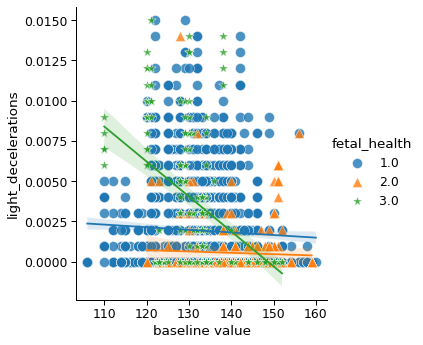

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

sns.lmplot(x='baseline value', y='light_decelerations', hue='fetal_health', data=df, markers=['o', '^','*'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

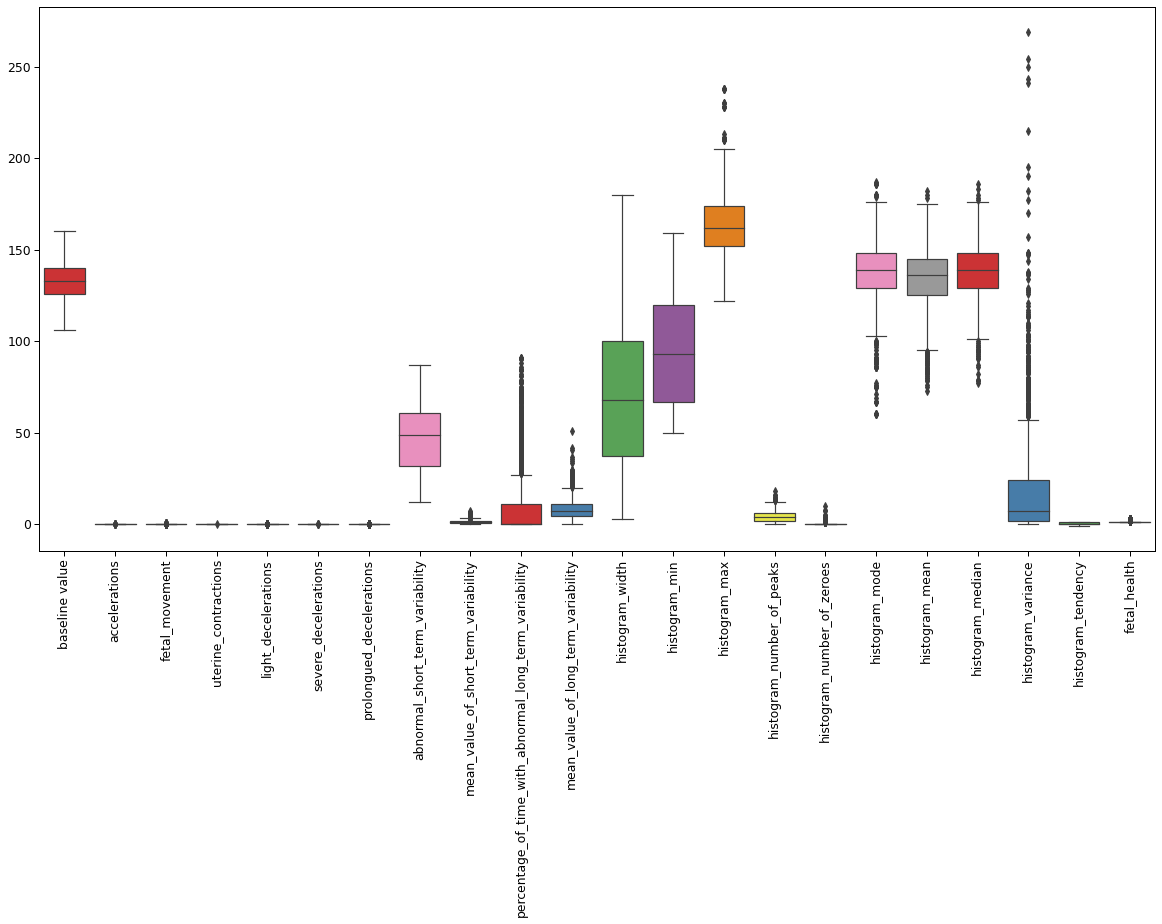

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

There are outliers in histogram variance, but this is to be expected.

Correlation heatmap.

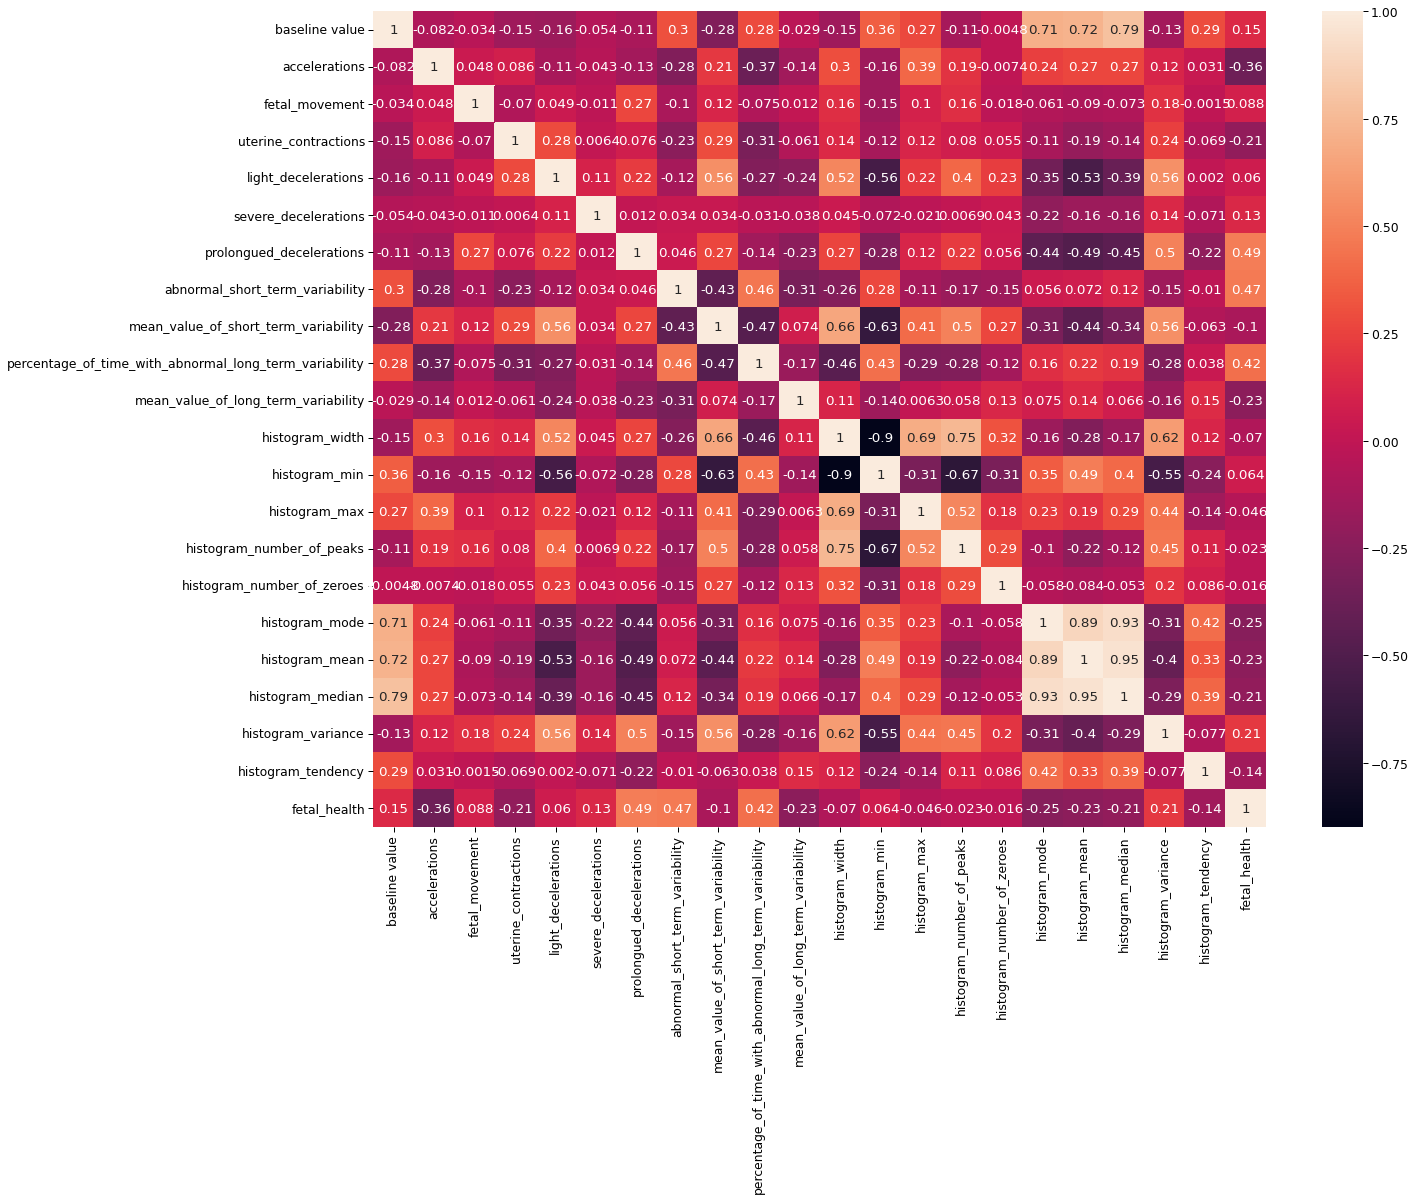

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)